In [9]:
import pandas as pd
# upload 'fake_or_real_news.csv' firsts
file_path = '/content/fake_or_real_news.csv'
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# New section

In [10]:
import numpy as np
df.shape


(6335, 4)

In [11]:
df.info()
# no NULL value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [12]:
# X = df.drop(("Unnamed: 0"),axis= 1)
# X = X.drop(("label"),axis= 1)
X = pd.DataFrame(df['text'])
y = df["label"]

In [13]:
y.replace({'FAKE':0,'REAL':1},inplace=True) #binary encoding
y.head()


0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [14]:
X.head()


,text
0,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,It's primary day in New York and front-runners...


In [15]:
def remove_stopwords(sentence):
    """
    Stopwords : refers to the most common words in a language (such as “the”, “a”, “an”, “in”) 
    which helps in formation of sentence to make sense, but these words does not provide any 
    significance in language processing so remove it .
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence


In [16]:
# titles = []
# for i in range(0,len(X)):
#   title = remove_stopwords(X['title'][i])
#   titles.append(title)
# titles = pd.DataFrame(titles,columns=['title'])
# X['title']=titles
# X.head()

In [17]:
texts= []
for i in range(0,len(X)):
  text = remove_stopwords(X['text'][i])
  texts.append(text)
texts = pd.DataFrame(texts,columns=['text'])
X['text']=texts
X.head()

,text
0,"daniel greenfield, shillman journalism fellow ..."
1,google pinterest digg linkedin reddit stumbleu...
2,u.s. secretary state john f. kerry said monday...
3,"— kaydee king (@kaydeeking) november 9, 2016 l..."
4,primary day new york front-runners hillary cli...


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [19]:
X_train.shape


(4244, 1)

In [20]:
X_test.shape


(2091, 1)

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
num_words = 2500
oov_token = '<OOV>'
# Instantiating the Tokenizer class, passing in the correct values for num_words and oov_token
tokenizer = Tokenizer(num_words=num_words,oov_token=oov_token)
    
# Fitting the tokenizer to the training sentences

tokenizer.fit_on_texts(X_train['text'])

In [30]:
word_index = tokenizer.word_index
# word_index

In [24]:
# Converting sentences to sequences
sequences = tokenizer.texts_to_sequences(X_train['text'])
test_sequences = tokenizer.texts_to_sequences(X_test['text'])
print(sequences[1:5])
print(test_sequences[1:5])

[[936, 2211, 1416, 348, 574, 95, 10, 320, 1, 455, 394, 12, 580, 191, 466, 258, 1, 1, 27, 1, 3, 1922, 1, 1, 1625, 17, 3, 1, 1649, 643, 2487, 483, 513, 36, 1, 463, 1062, 1998, 320, 455, 258, 697, 1, 242, 399, 383, 1, 342, 1, 3, 1911, 321, 1, 1126, 258, 1, 910, 919, 1, 1, 342, 1, 342, 1, 342, 1, 1, 1, 1, 1, 1, 1, 342, 1, 342, 1, 155, 342, 1, 3, 1, 16, 314, 1, 537, 1, 1, 1911, 321, 297, 99, 1, 1, 1, 102, 1, 630, 294, 1, 586, 1259, 8, 1706, 970, 1, 1, 1, 2372, 189, 281, 1, 1, 1, 1084, 1, 62, 544, 850, 1, 1, 258, 1012, 277, 1, 1, 29, 31, 2020, 163, 1, 258, 1, 1, 1, 1, 1375, 1, 1, 1164, 636, 1, 1, 1117, 1164, 302, 1, 1, 1, 258, 1, 1, 1, 1, 1, 1, 970, 1636, 1, 277, 116, 328, 643, 1, 86, 1012, 1, 8, 192, 360, 91, 1, 192, 1, 6, 1545, 313, 6, 1454, 1, 643, 1337, 320, 2092, 76, 633, 1056, 300, 4, 1021, 1, 235, 1512, 1, 1093, 157, 258, 1, 321, 1, 1, 1056, 1, 65, 60, 105, 1065, 4, 612, 1164, 105, 302, 1, 890, 280, 1, 1502, 1, 235, 1295, 1, 1, 1, 1, 1, 1021, 1, 1093, 157, 297, 99, 1, 1, 321, 1337, 1,

In [25]:
maxlen = 120
padding = 'post' 
padded_sequences = pad_sequences(sequences,maxlen=maxlen,padding=padding)
test_padded_sequences = pad_sequences(test_sequences,maxlen=maxlen,padding=padding)
test_padded_sequences.shape


(2091, 120)

In [26]:
def create_model(num_words, embedding_dim, maxlen):
    
    tf.random.set_seed(123)
    
   
    
    model = tf.keras.Sequential([ 
        tf.keras.layers.Embedding(num_words,embedding_dim,input_length=maxlen),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 


    return model


In [27]:
EMBEDDING_DIM = 6

model = create_model(num_words, EMBEDDING_DIM, maxlen)

history = model.fit(padded_sequences, y_train, epochs=10, validation_data=(test_padded_sequences, y_test))

Epoch 1/10
133/133 [==============================] - 2s 5ms/step - loss: 0.6833 - accuracy: 0.6730 - val_loss: 0.6637 - val_accuracy: 0.7159
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.8018 - val_loss: 0.5381 - val_accuracy: 0.8063
Epoch 3/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8582 - val_loss: 0.4098 - val_accuracy: 0.8503
Epoch 4/10
133/133 [==============================] - 1s 4ms/step - loss: 0.3274 - accuracy: 0.8893 - val_loss: 0.3509 - val_accuracy: 0.8546
Epoch 5/10
133/133 [==============================] - 0s 4ms/step - loss: 0.2652 - accuracy: 0.9039 - val_loss: 0.3290 - val_accuracy: 0.8666
Epoch 6/10
133/133 [==============================] - 1s 4ms/step - loss: 0.2252 - accuracy: 0.9166 - val_loss: 0.3160 - val_accuracy: 0.8661
Epoch 7/10
133/133 [==============================] - 1s 5ms/step - loss: 0.1951 - accuracy: 0.9317 - val_loss: 0.3147 - val_accuracy: 0.8642
Epoch 

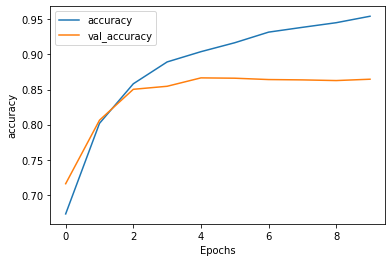

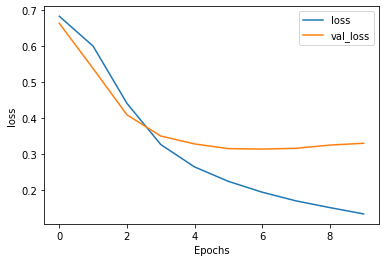

In [28]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#END